# CAR INSURANCE COLD CALLS 

## DATA ANALYSIS


### Data Munging 

First we start by importing Pandas, Numpy, Matplotlib and Seaborn libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the external Csv file and load it into a Pandas Dataframe
Using the Id column as index to make things simple

In [2]:
df = pd.read_csv('carInsurance_train.csv',index_col = 'Id')

Take a look at the top rows of the data

In [3]:
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


What about the last few rows? Well looks like we have around 4000 entries

In [4]:
df.tail()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0
4000,45,services,married,primary,0,137,1,0,NaN,9,may,2,-1,0,NaN,13:31:48,13:36:22,0


### EXPLORATORY DATA ANALYSIS

We have 18 column attributes to work with!! Looks interesting !

In [5]:
df.shape

(4000, 18)

Lets see what are the columns in our dataframe

In [6]:
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

Looking at our Numerical columns , something looks interesting here
Default, HHInsurance, CarLoan,CarInsurance are binary having 0's' and 1's'

In [7]:
df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


Making sure our datatypes are fine, needs a fix on CallStart and CallEnd attributes which are objects,
lets work on it a little later

In [9]:
df.dtypes

Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

Missing values in our data occurs mostly in Outcome and Communication fields

In [10]:
df.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

Lets look at our categorical data

In [12]:
df.describe(include=['O'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,11:48:25,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


Lets visualize some data
### DATA VISUALIZATION

### Univariate Analysis
Plotting Balance field as a Boxplot
There are quite a few outliers in our data but one particular outlier is too far

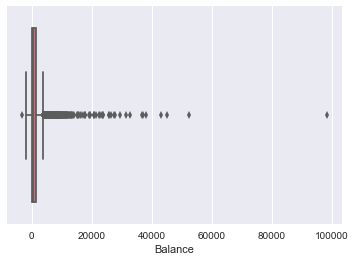

In [13]:
sns.boxplot(x='Balance',data=df,palette='hls');

Max function to look for maximum values in each field

In [14]:
df.max()

Age                       95
Marital               single
Default                    1
Balance                98417
HHInsurance                1
CarLoan                    1
LastContactDay            31
LastContactMonth         sep
NoOfContacts              43
DaysPassed               854
PrevAttempts              58
CallStart           17:59:58
CallEnd             18:25:31
CarInsurance               1
dtype: object

Looking for the particular max field in Balance

In [15]:
df[df['Balance']>90000]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


Getting rid of 
### Outlier
to make more sense of the data

In [16]:
dfnew = df.drop(df.index[1742]);

Double checking whether everything looks fine

In [17]:
dfnew.max()

Age                       95
Marital               single
Default                    1
Balance                52587
HHInsurance                1
CarLoan                    1
LastContactDay            31
LastContactMonth         sep
NoOfContacts              43
DaysPassed               854
PrevAttempts              58
CallStart           17:59:58
CallEnd             18:25:31
CarInsurance               1
dtype: object

Lets see how each atttribute Correlates with one another using Heatmap
DaysPassed and PrevAttempts have a positive Correlation with each other


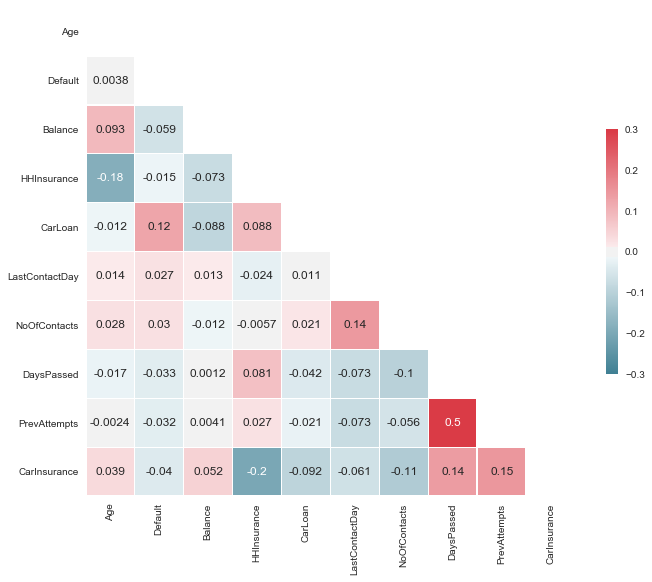

In [18]:
sns.set(style="white")
corr = dfnew.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

The variables for the Pairplot are selected from the heatmap which have an impact on the outcome
### Key takeaways from the Pairplot
-Older people are more likely to Buy Car Insurance.                                                                              
-People having prior Car Insurance and Home Insurance are less likely to purchase.                                                
-People give a positive sign if the days passed (time before they were contacted) increases.                                       
-When you contact persons frequently their buying tendency increases after 20+ contacts.                                          
-No.of contacts and PrevAttempts work the same , more the better i.e increases Car Insurance purchase.

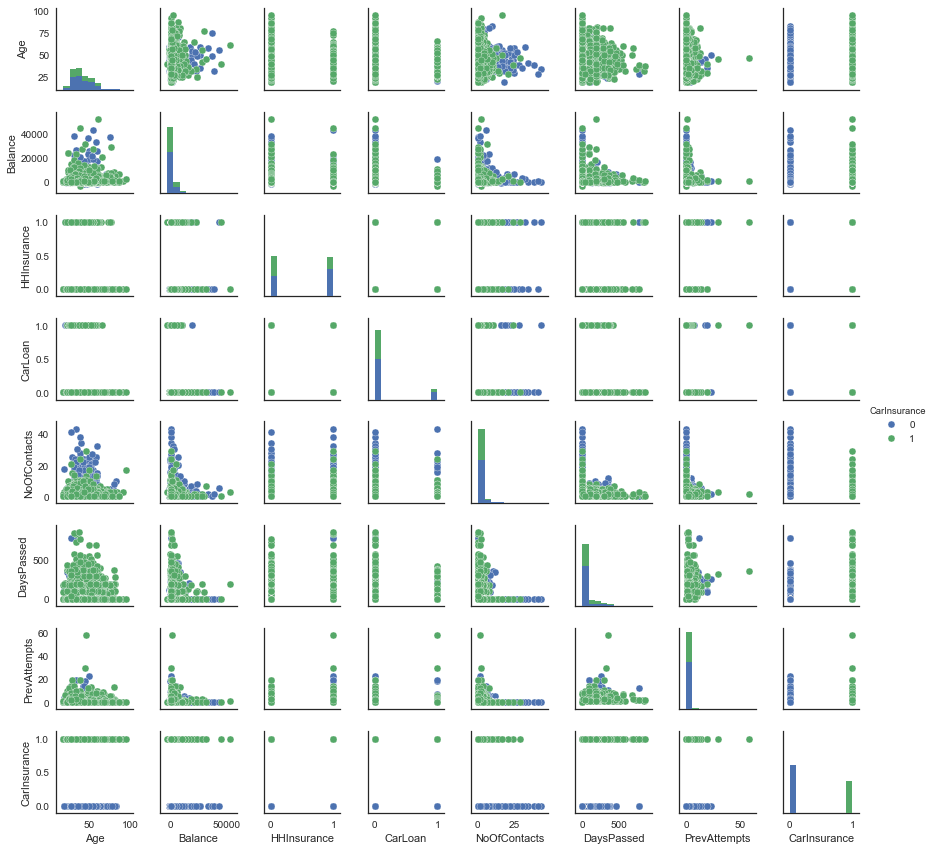

In [19]:
dfsub = ['Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts','CarInsurance']
sns.pairplot(dfnew[dfsub],hue='CarInsurance',size=1.5);

PairGrid helps us to view relationships between CarInsurance,Balance and Categorical variables such as Education,Marital Status and Job.

Students and Retired people have purchase the most Car Insurances with Former leading the Latter                                  
People with single status and who are highly educated dominate the charts                                                                                  

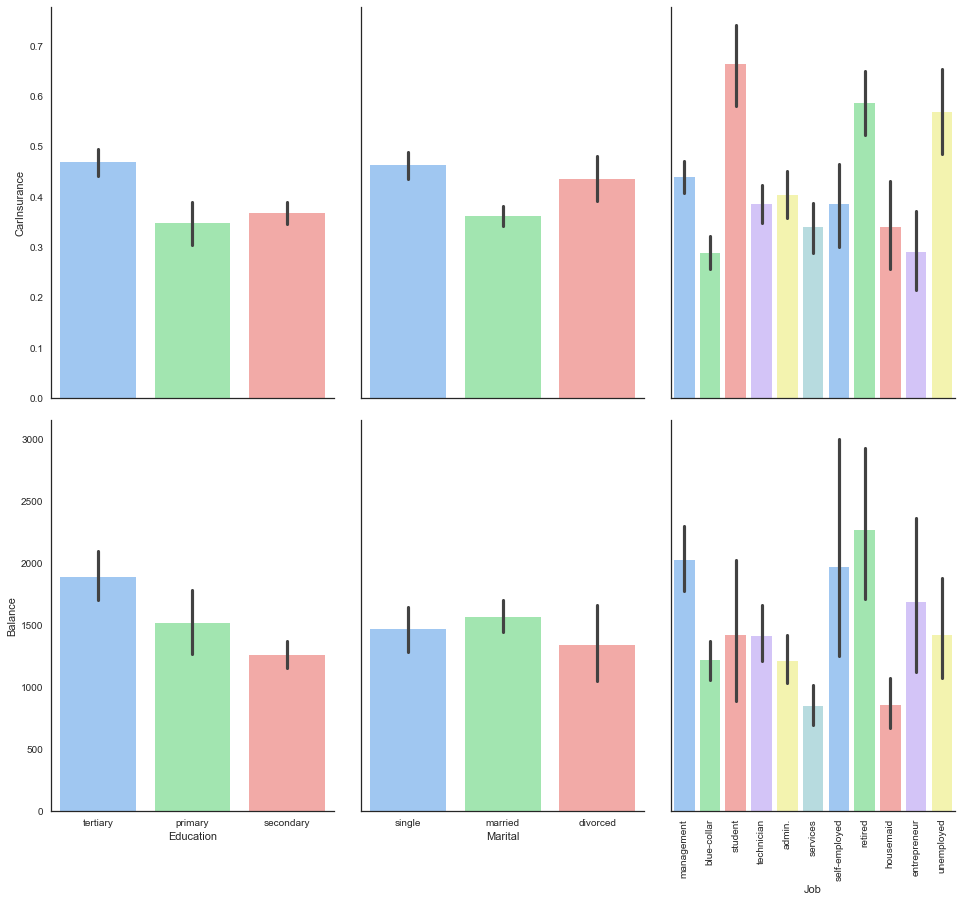

In [20]:
g = sns.PairGrid(dfnew,
                 x_vars=["Education","Marital", "Job"],
                 y_vars=["CarInsurance", "Balance"],
                 aspect=.75, size=6)
plt.xticks(rotation=90)
g.map(sns.barplot, palette="pastel");

Violin plot has bulges near 1 shows that Mar, Sep, Oct and Dec are the desired months for people buying Car Insurance

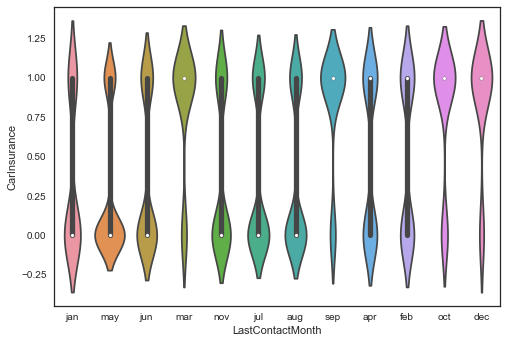

In [21]:
sns.violinplot(x="LastContactMonth",y='CarInsurance',data=dfnew);

Count plot shows that outcome doesnt really show whether people opt for Car Insurance

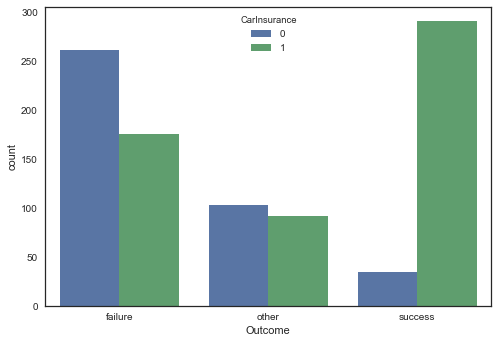

In [22]:
sns.countplot(x="Outcome",hue='CarInsurance',data=dfnew);

Filling Missing values using pad method for Job Attribute

In [23]:
dfnew['Job'] = dfnew['Job'].fillna(method = 'pad')

In [25]:
dfnew['Job'].isnull().sum()

0